# Batch Vs Stochastic Gradient Descent

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time

### Imporing Dataset from github

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sahdevsaini/Data-Set/main/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df[['Age','EstimatedSalary','Purchased']]

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


### Dependent & Independent Features

In [6]:
X = df.iloc[:,0:2]                  # Independent Features
y = df.iloc[:,-1]                   # Dependent Features

In [7]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


### Data Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [9]:
X_scaled.shape

(400, 2)

### Splitting data into Test & train

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [11]:
X_train.shape

(320, 2)

### Importing Libraries for Model Creation

In [12]:
#pip install tensorflow

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

2024-08-12 06:49:10.907966: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-12 06:49:10.913709: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-12 06:49:10.933690: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-12 06:49:10.965772: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-12 06:49:10.975302: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-12 06:49:10.998558: I tensorflow/core/platform/cpu_feature_gu

### Model Creation

In [14]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

```python
batch_size=320 means we are using Batch GD 
Means we are creating only one Batch of 320 & weight weight will be Updated on once after 1 Epoch
because X_train.shape = 320 

if we put batch_size = 1 means Stochastic GD 
we are creating 320 different batches & Weight will updated more 320 times in one epoch 
```

#### If verbose= 0 means message will not print 
#### if Verbose = 2 means message will print

## Batch Gradient Descent

In [20]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=50,batch_size=320,validation_split=0.2,verbose= 0)
Batch_time = time.time() - start
print("Time taken by Batch GD",Batch_time)

Time taken by Batch GD 4.380446434020996


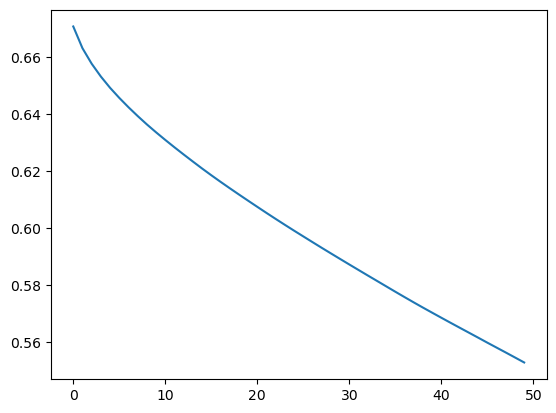

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

## Stochastic Gradient Descent

In [21]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=50,batch_size=1,validation_split=0.2,verbose= 0)
Stochastic_time = time.time() - start
print("Time Taken by Stochastic GD",Stochastic_time)

Time Taken by Stochastic GD 21.863255977630615


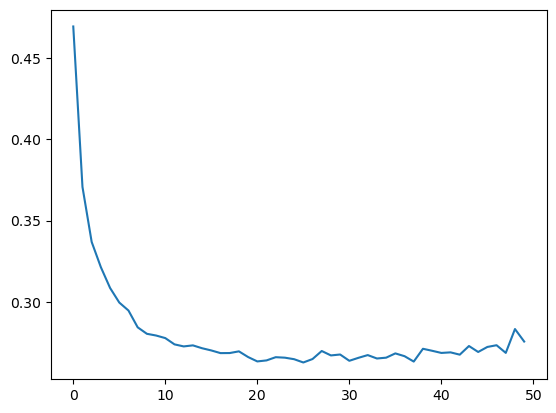

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

### Mini Batch Gradient Descent

In [22]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


```python
if we put batch_size = factor of trainig size then it means Mini batch GD 
if we put batch_size  =  80
we are creating 320 different batches & Weight will updated more 320 times in one epoch 
```

In [25]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=50,batch_size=40,validation_split=0.2,verbose= 0)
Mini_Batch_time  = time.time() - start
print("Total time taken in Mini Batch Gradient Descenyt",Mini_Batch_time)

Total time taken in Mini Batch Gradient Descenyt 4.80681037902832


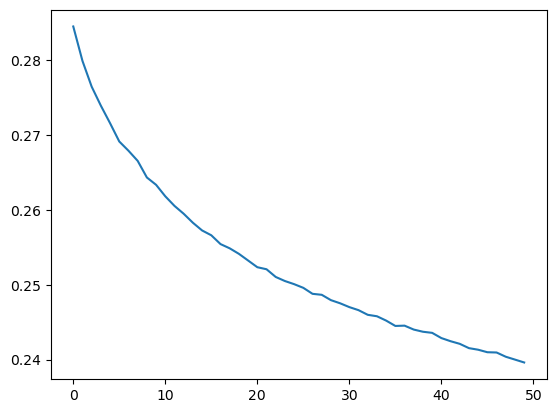

In [26]:
plt.plot(history.history['loss'])

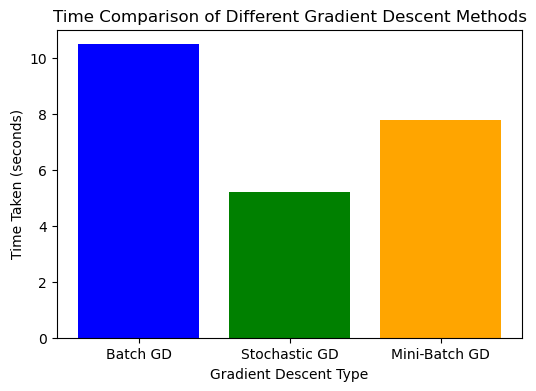

In [30]:
import matplotlib.pyplot as plt

# Example times taken by each gradient descent type (in seconds)
Batch_time = 10.5         # Replace with the actual time
Stochastic_time = 5.2     # Replace with the actual time
Mini_Batch_time = 7.8     # Replace with the actual time

# Names of the gradient descent types
methods = ['Batch GD', 'Stochastic GD', 'Mini-Batch GD']
times = [Batch_time, Stochastic_time, Mini_Batch_time]

# Plotting the graph
plt.figure(figsize=(6,4))
plt.bar(methods, times, color=['blue', 'green', 'orange'])

plt.xlabel('Gradient Descent Type')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Comparison of Different Gradient Descent Methods')
plt.show()


### Which is faster (given same no. of epochs)

```
Batch GD is fater as compare to Stochastic GD becacuse no of update is less in Batch as Compare to 
Stochastic GD
```

### Which is the faster to converge (given some # epocus)

```python
Stochastic GD is Converge faster then Batch GD because no of update is more in Stochastic GD as compare to Batch GD,
So Stochastic GD require less no of epochs as compare to batch GD
```